# Titanic Solution for Kaggle competition

Here is a link for some more ideas to visualise the datas: http://scikit-learn.org/stable/modules/tree.html

We first start by importing the different libraries.

In [1]:
import pandas as pd
from sklearn import tree
import numpy as np
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

The training and test datas have different kind of missing data that we must complete before we can proceed to the modification of these datas.

In [2]:
train_df = pd.read_csv("datas/train.csv")
test_df = pd.read_csv("datas/test.csv")
full_datas = (train_df, test_df)

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Three features are to complete for the training dataset:
<ul>
    <li>Age</li>
    <li>Cabin</li>
    <li>Embarked</li>
</ul>

<ul>
    <li>There are too many missing datas for the Cabin and it does not seem like an interesting feature to predict Survival. So I decided to drop this feature.</li>
    <li>I also decided to drop the Ticket feature, as the ticket format is not always the same. Also it does not seem like it is a deciseve feature for Survival</li>

In [4]:
for dataset in full_datas:
    dataset.drop(["Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)

In [5]:
for dataset in full_datas:
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median())

In [6]:
for dataset in full_datas:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

C:\Users\roland\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
for dataset in full_datas:
    dataset["Embarked"] = dataset['Embarked'].fillna('S')
    #dataset.Embarked = dataset["Embarked"].map({"Q": 0, "S": 1, "C": 2}).astype(int)

In [132]:
for dataset in full_datas:
    dataset.Sex = dataset["Sex"].map({"male": 0, "female": 1})

In [8]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S


In [9]:
for dataset in full_datas:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    #dataset.Title = dataset["Title"].map({"Master": 0, "Miss": 1, "Mlle":2, "Mme": 3, "Mr": 4, "Mrs": 5, "Ms":6, "Rare": 7})
    dataset.drop(["Name"], axis=1, inplace=True)

In [10]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22,1,0,7.2500,S,Mr
1,1,1,female,38,1,0,71.2833,C,Mrs
2,1,3,female,26,0,0,7.9250,S,Miss
3,1,1,female,35,1,0,53.1000,S,Mrs
4,0,3,male,35,0,0,8.0500,S,Mr


In [11]:
labels = train_df.Survived
features = train_df.drop(["Survived"], axis=1)

In [12]:
features.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.410774,0.523008,0.381594,32.204208
std,0.836071,13.549976,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,37.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22,1,0,7.2500,S,Mr
1,1,1,female,38,1,0,71.2833,C,Mrs
2,1,3,female,26,0,0,7.9250,S,Miss
3,1,1,female,35,1,0,53.1000,S,Mrs
4,0,3,male,35,0,0,8.0500,S,Mr


In [16]:
train_df.to_csv("train_csv")

-------------------------------------

# ----------------- Etude des données pour Tree -----------------

In [187]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<ul>
    <li>classe1 ( Sex == female )</li>
    <li>classe2 ( Sex == male )</li>
</ul>

In [188]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<ul>
    <li>classe1 ( Pclass > 2.5 )</li>
    <li>classe2 ( Pclass <= 2.5 )</li>
</ul>

In [189]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<ul>
    <li>classe1 ( 0 < SibSp <= 2 )</li>
    <li>classe2 ( SibSp == 0 )</li>
    <li>classe3 (SibSp > 2) </li>
</ul>

In [190]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<ul>
    <li>classe1 ( 0 < SibSp <= 3 )</li>
    <li>classe2 ( Parch == 0 )</li>
    <li>classe3 ( Parch > 3) </li>
</ul>

In [191]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [192]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


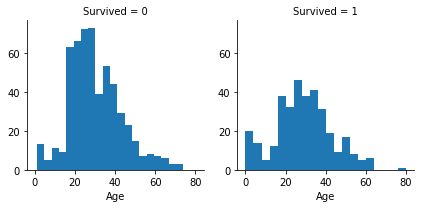

In [193]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

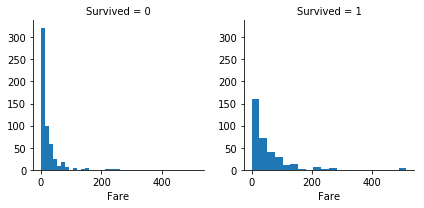

In [194]:
g = sns.FacetGrid(train_data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAagAAADQCAYAAABStPXYAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAE4NJREFUeJzt3X/wXXV95/Hnq4DoFpcfGhiaxA3V%0AtCvurFG+pWxZd6m024jdBmehxbWadtiJf+AO7trpxHZntLPrLM5spTpdnKbFIXSsgGiHjDqtNMLU%0A7qxAoDEYspZYsvI1WRIKotjKNuG9f9zPd7l+ucn33nzvNzn3fp+PmTv3nM/5nHM/58rb1z3ne3JO%0AqgpJkrrmh072ACRJGsSAkiR1kgElSeokA0qS1EkGlCSpkwwoSVInGVBLKMlvJtmdZFeSnUl+ckzb%0A/YUkm8e0rWfHsI3Tk9yeZG+S+5KsWfzIpBcso1r6F0keSnI4yVXjGNckO/VkD2BaJflnwM8Db6yq%0A55K8EnjJCOufWlWHBy2rqm3AtvGMdCyuBZ6uqtckuQb4MPBLJ3lMmhLLrJa+CfwK8GsneRyd4BHU%0A0jkfeLKqngOoqieraj9Akn2tyEgyk+TeNv3BJFuSfBG4tR2NvG5ug0nuTXJRkl9J8rtJzmzb+qG2%0A/B8keTzJaUleneRPkjyY5MtJ/nHrc0GS/5nkgST/eUz7ugHY2qbvBC5PkjFtW1o2tVRV+6pqF/D8%0AOLY36QyopfNFYHWSv0pyU5J/OeR6FwEbqurfArcBvwiQ5HzgR6rqwbmOVfUM8FVgbtv/GvjTqvp7%0AYAvw76vqInq/xm5qfT4KfLyqfgL4P0cbRCvEnQNePzOg+0rg8Tamw8AzwCuG3F9pIcupltTHU3xL%0ApKqeTXIR8Cbgp4Hbk2yuqlsWWHVbVf1dm74DuBv4AL3i+vSA/rfTO512D3ANcFOSM4CfAj7ddyBz%0Aenu/FPg3bfoP6Z2OGzT+Ny0wzn6Djpa8h5bGYpnVkvoYUEuoqo4A9wL3JnkY2AjcAhzmhaPXl85b%0A7Xt9638ryd8k+af0CufdAz5mG/Bfk5xD7xfjl4AfBr5dVeuONrSFxp7ky8DLByz6tar6s3lts8Bq%0AYDbJqcCZwFMLfYY0rGVUS+rjKb4lkuTHk6zta1oH/O82vY9eAcALv8CO5jbg14Ezq+rh+Qur6lng%0AfnqnGz5XVUeq6jvAY0mubmNJkte3Vf4HvV+HAO842odW1Zuqat2A16CC2kbv/zAArgK+VN6FWGOy%0AzGpJfQyopXMGsDXJI0l2ARcCH2zLfgv4aPtldWSB7dxJrwjuOEaf24Ffbu9z3gFcm+SrwG56FzIA%0AXA9cl+QBekc643Az8Ioke4H/CIzlsl2pWTa1lOQnkswCVwO/l2T3OLY7qeIPXUlSF3kEJUnqJANK%0AktRJBpQkqZMMKElSJ3UioNavX1/0/j2BL19df3WateRrQl5D6URAPfnkkyd7CNJUsJY0TToRUJIk%0AzWdASZI6yYCSJHWSASVJ6iQDSpLUSQaUJKmTJuJ5UGs2f/4H5vfd8NaTNBJJ0oniEZQkqZMMKElS%0AJxlQkqROMqAkSZ1kQEmSOmnBgEry0iT3J/lqkt1Jfqu1X5DkviSPJrk9yUta++ltfm9bvmZpd0Ga%0ADNaSNJphjqCeA95cVa8H1gHrk1wCfBi4sarWAk8D17b+1wJPV9VrgBtbP0nWkjSSBQOqep5ts6e1%0AVwFvBu5s7VuBK9v0hjZPW355koxtxNKEspak0Qz1N6gkpyTZCRwE7ga+AXy7qg63LrPAyja9Engc%0AoC1/BnjFgG1uSrIjyY5Dhw4tbi+kCWEtScMbKqCq6khVrQNWARcDrx3Urb0P+oX3oicoVtWWqpqp%0AqpkVK1YMO15pollL0vBGuoqvqr4N3AtcApyVZO5WSauA/W16FlgN0JafCTw1jsFK08JakhY2zFV8%0AK5Kc1aZfBvwMsAe4B7iqddsI3NWmt7V52vIvVdXQz6CXppW1JI1mmJvFng9sTXIKvUC7o6o+l+QR%0A4LYk/wX4S+Dm1v9m4A+T7KX3a++aJRi3NImsJWkECwZUVe0C3jCg/a/pnUOf3/594OqxjE6aItaS%0ANBrvJCFJ6iQDSpLUSQaUJKmTDChJUicZUJKkTjKgJEmdZEBJkjrJgJIkdZIBJUnqJANKktRJBpQk%0AqZMMKElSJxlQkqROGuZ5UKuT3JNkT5LdSa5v7R9M8q0kO9vrir513p9kb5KvJ/m5pdwBaVJYS9Jo%0Ahnke1GHgfVX1UJKXAw8mubstu7Gq/lt/5yQX0ntuzeuAHwH+LMmPVdWRcQ5cmkDWkjSCBY+gqupA%0AVT3Upr9L7wmgK4+xygbgtqp6rqoeA/Yy4Fk30nJjLUmjGelvUEnW0Hvg2n2t6T1JdiX5RJKzW9tK%0A4PG+1WYZUIRJNiXZkWTHoUOHRh64NMmsJWlhQwdUkjOAzwDvrarvAB8HXg2sAw4Avz3XdcDq9aKG%0Aqi1VNVNVMytWrBh54NKkspak4QwVUElOo1dQn6yqzwJU1RNVdaSqngd+nxdOPcwCq/tWXwXsH9+Q%0ApcllLUnDG+YqvgA3A3uq6iN97ef3dXsb8LU2vQ24JsnpSS4A1gL3j2/I0mSylqTRDHMV36XAO4GH%0Ak+xsbb8BvD3JOnqnHPYB7waoqt1J7gAeoXfV0nVedSQB1pI0kgUDqqr+gsHnwr9wjHU+BHxoEeOS%0Apo61JI3GO0lIkjrJgJIkdZIBJUnqJANKktRJBpQkqZMMKElSJxlQkqROMqAkSZ1kQEmSOsmAkiR1%0AkgElSeokA0qS1EkGlCSpk4Z5HtTqJPck2ZNkd5LrW/s5Se5O8mh7P7u1J8nHkuxtj7B+41LvhDQJ%0ArCVpNMMcQR0G3ldVrwUuAa5LciGwGdheVWuB7W0e4C30Hqy2FthE73HWkqwlaSQLBlRVHaiqh9r0%0Ad4E9wEpgA7C1ddsKXNmmNwC3Vs9XgLPmPTFUWpasJWk0I/0NKska4A3AfcB5VXUAeoUHnNu6rQQe%0A71tttrXN39amJDuS7Dh06NDoI5cmmLUkLWzogEpyBvAZ4L1V9Z1jdR3QVi9qqNpSVTNVNbNixYph%0AhyFNPGtJGs5QAZXkNHoF9cmq+mxrfmLudEN7P9jaZ4HVfauvAvaPZ7jSZLOWpOENcxVfgJuBPVX1%0Akb5F24CNbXojcFdf+7vaFUiXAM/Mnb6QljNrSRrNqUP0uRR4J/Bwkp2t7TeAG4A7klwLfBO4ui37%0AAnAFsBf4W+BXxzpiaXJZS9IIFgyoqvoLBp8LB7h8QP8CrlvkuKSpYy1Jo/FOEpKkTjKgJEmdZEBJ%0AkjrJgJIkdZIBJUnqJANKktRJBpQkqZMMKElSJxlQkqROMqAkSZ1kQEmSOsmAkiR10jB3M5c0JdZs%0A/vxRl+274a0ncCTSwoZ5HtQnkhxM8rW+tg8m+VaSne11Rd+y9yfZm+TrSX5uqQYuTRprSRrNMKf4%0AbgHWD2i/sarWtdcXAJJcCFwDvK6tc1OSU8Y1WGnC3YK1JA1twYCqqj8HnhpyexuA26rquap6jN6D%0A1i5exPikqWEtSaNZzEUS70myq522OLu1rQQe7+sz29okHZ21JA1wvAH1ceDVwDrgAPDbrX3Q00Jr%0A0AaSbEqyI8mOQ4cOHecwpIlnLUlHcVwBVVVPVNWRqnoe+H1eOPUwC6zu67oK2H+UbWypqpmqmlmx%0AYsXxDEOaeNaSdHTHFVBJzu+bfRswd1XSNuCaJKcnuQBYC9y/uCFK08tako5uwX8HleRTwGXAK5PM%0AAh8ALkuyjt4ph33AuwGqaneSO4BHgMPAdVV1ZGmGLk0Wa0kazYIBVVVvH9B88zH6fwj40GIGJU0j%0Aa0kajbc6kiR1kgElSeokA0qS1EkGlCSpkwwoSVInGVCSpE4yoCRJnWRASZI6yYCSJHWSASVJ6iQD%0ASpLUSQaUJKmTDChJUictGFDtMdQHk3ytr+2cJHcnebS9n93ak+RjSfa2R1i/cSkHL00Sa0kazTBH%0AULcA6+e1bQa2V9VaYHubB3gLvQerrQU20XuctaSeW7CWpKEtGFBV9efAU/OaNwBb2/RW4Mq+9lur%0A5yvAWfOeGCotW9aSNJrj/RvUeVV1AKC9n9vaVwKP9/WbbW2SBrOWpKNY8Im6I8qAthrYMdlE79QF%0Ar3rVq0b6kDWbP/8D8/tueOtI60sT4ITUktRlx3sE9cTc6Yb2frC1zwKr+/qtAvYP2kBVbamqmaqa%0AWbFixXEOQ5p41pJ0FMcbUNuAjW16I3BXX/u72hVIlwDPzJ2+kDSQtSQdxYKn+JJ8CrgMeGWSWeAD%0AwA3AHUmuBb4JXN26fwG4AtgL/C3wq0swZmkiWUvSaBYMqKp6+1EWXT6gbwHXLXZQ0jSylqTReCcJ%0ASVInGVCSpE4yoCRJnWRASZI6yYCSJHWSASVJ6iQDSpLUSeO+F5+kCTX/Hpfzec9LnWgeQUmSOsmA%0AkiR1kgElSeokA0qS1EkGlCSpk6biKj6fsCtJ02dRAZVkH/Bd4AhwuKpmkpwD3A6sAfYBv1hVTy9u%0AmNJ0s5akFxvHKb6frqp1VTXT5jcD26tqLbC9zUtamLUk9VmKv0FtALa26a3AlUvwGdJyYC1pWVts%0AQBXwxSQPJtnU2s6rqgMA7f3cQSsm2ZRkR5Idhw4dWuQwpIlnLUnzLPYiiUuran+Sc4G7k/yvYVes%0Aqi3AFoCZmZla5DikSWctSfMs6giqqva394PAHwMXA08kOR+gvR9c7CClaWctSS923AGV5IeTvHxu%0AGvhXwNeAbcDG1m0jcNdiBylNM2tJGmwxp/jOA/44ydx2/qiq/iTJA8AdSa4FvglcvfhhSlNtImrJ%0Au53rRDvugKqqvwZeP6D9b4DLFzMoaTmxlqTBvNWRJKmTDChJUicZUJKkTpqKm8VKOvm8iELj5hGU%0AJKmTpvIIysdvSNLk8whKktRJBpQkqZOm8hTfQjwFKEnd5xGUJKmTluURlKRu8RJ1DWJASTohFgoh%0Aab5lEVAWhiRNniULqCTrgY8CpwB/UFU3LNVnLZYXTairJqmOusrTh5NrSQIqySnAfwd+FpgFHkiy%0AraoeWYrPW2qjBpiBp3GYtjqaVAbcYMf6Xsb1nSzVEdTFwN72nBuS3AZsAKaysJb6FOJitr9ci2dK%0ALKs6OpalDAn/BNBdqarxbzS5ClhfVf+uzb8T+Mmqek9fn03Apjb748DXj7HJVwJPjn2g3bXc9hcm%0AZ5+frKr1J+KDhqmj1m4tHZ37201D1dFSHUFlQNsPJGFVbQG2DLWxZEdVzYxjYJNgue0vLM99HsKC%0AdQTW0rG4v5Ntqf6h7iywum9+FbB/iT5LmlbWkZa1pQqoB4C1SS5I8hLgGmDbEn2WNK2sIy1rS3KK%0Ar6oOJ3kP8Kf0Lo/9RFXtXsQmhzp9MUWW2/7C8tznY1qCOoLl9z27vxNsSS6SkCRpsbxZrCSpkwwo%0ASVIndTqgkqxP8vUke5NsPtnjGZckq5Pck2RPkt1Jrm/t5yS5O8mj7f3s1p4kH2vfw64kbzy5e3B8%0AkpyS5C+TfK7NX5Dkvra/t7cLAUhyepvf25avOZnjngbTWEvW0fTXUWcDqu82L28BLgTenuTCkzuq%0AsTkMvK+qXgtcAlzX9m0zsL2q1gLb2zz0voO17bUJ+PiJH/JYXA/s6Zv/MHBj29+ngWtb+7XA01X1%0AGuDG1k/HaYpryTrqmdo66mxA0Xebl6r6v8DcbV4mXlUdqKqH2vR36f3HtpLe/m1t3bYCV7bpDcCt%0A1fMV4Kwk55/gYS9KklXAW4E/aPMB3gzc2brM39+57+FO4PLWX8dnKmvJOpr+OupyQK0EHu+bn21t%0AU6Uddr8BuA84r6oOQK/4gHNbt2n4Ln4H+HXg+Tb/CuDbVXW4zffv0//f37b8mdZfx2ca/vs5Juto%0AOuuoywE11G1eJlmSM4DPAO+tqu8cq+uAton5LpL8PHCwqh7sbx7QtYZYptFN9fdpHb3I1NRRlx9Y%0AONW3eUlyGr2i+mRVfbY1P5Hk/Ko60E49HGztk/5dXAr8QpIrgJcC/5DeL8Gzkpzaft3179Pc/s4m%0AORU4E3jqxA97akz6fz9HZR1Ndx11+Qhqam/z0s4D3wzsqaqP9C3aBmxs0xuBu/ra39WuQroEeGbu%0AFMYkqKr3V9WqqlpD73/HL1XVO4B7gKtat/n7O/c9XNX6T9Qvv46ZylqyjpZBHVVVZ1/AFcBfAd8A%0AfvNkj2eM+/XP6R1q7wJ2ttcV9M4Pbwcebe/ntP6hdxXWN4CHgZmTvQ+L2PfLgM+16R8F7gf2Ap8G%0ATm/tL23ze9vyHz3Z45701zTWknU0/XXkrY4kSZ3U5VN8kqRlzICSJHWSASVJ6iQDSpLUSQaUJKmT%0AuvwPdTVAkiP0LpGdc2VV7TtJw5EmlrXUfV5mPmGSPFtVZxzHeqdU1ZGlGJM0iayl7vMU3xRIsibJ%0Al5M81F4/1dova8/L+SPaL8Ukv5zk/iQ7k/xeexSDJKylrvEU3+R5WZKdbfqxqnobvXuN/WxVfT/J%0AWuBTwEzrczHwT6rqsSSvBX4JuLSq/j7JTcA7gFtP8D5IXWAtdZwBNXn+rqrWzWs7DfjdJOuAI8CP%0A9S27v6oea9OXAxcBD7THwryMF26kKS031lLHGVDT4T8ATwCvp3fa9vt9y77XNx1ga1W9/wSOTZok%0A1lKH+Deo6XAmcKCqngfeCRztXPh24Kok5wIkOSfJPzpBY5QmgbXUIQbUdLgJ2JjkK/ROSXxvUKeq%0AegT4T8AXk+wC7gYm6pHX0hKzljrEy8wlSZ3kEZQkqZMMKElSJxlQkqROMqAkSZ1kQEmSOsmAkiR1%0AkgElSeqk/wdFhUGxcnzQ9AAAAABJRU5ErkJggg==df, col='Survived')
g.map(plt.hist, 'Fare', bins=20)
plt.show()

<ul>
    <li>classe1 ( Fare > 23.350 )</li>
    <li>classe2 ( Fare <= 23.350 )</li>
</ul>

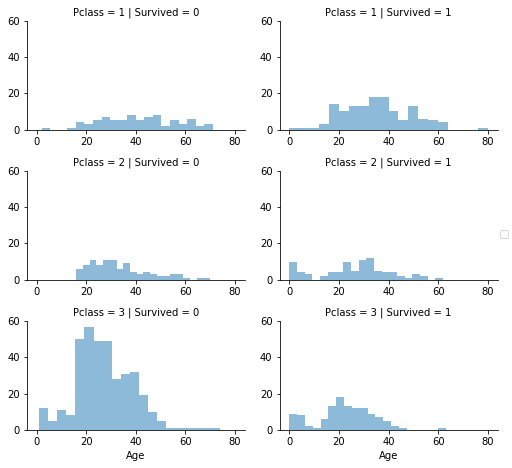

In [195]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
plt.show()

<ul>
    <li>classe1 ( Age > 5.5 )</li>
    <li>classe2 ( Age <= 5.5 )</li>
</ul>

------------------------------------------------------------------------------------------------------------------

# Determinons maintenant l'entropy de chaque

In [229]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22,1,0,7.2500,S,Mr
1,1,1,female,38,1,0,71.2833,C,Mrs
2,1,3,female,26,0,0,7.9250,S,Miss
3,1,1,female,35,1,0,53.1000,S,Mrs
4,0,3,male,35,0,0,8.0500,S,Mr


In [247]:
nbr_male_dead = 0
nbr_male_survived = 0

nbr_female_dead = 0
nbr_female_survived = 0

value = "Parch"

for k in range(len(train_df[value])):
    if(train_df[value][k] > 3):
        if(train_df["Survived"][k] == 0):
            nbr_male_dead += 1
        else:
            nbr_male_survived += 1
    else:
        if(int(train_df["Survived"][k]) == 0):
            nbr_female_dead += 1
        else:
            nbr_female_survived += 1

print("> 3: ("+str(nbr_male_survived)+"," +str(nbr_male_dead)+")")
print("<= 3: ("+str(nbr_female_survived)+"," +str(nbr_female_dead)+")")

> 3: (1,9)
<= 3: (341,540)


In [149]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, labels)

In [39]:
predicting = clf.predict(features)

In [96]:
features.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,3,0,22,1,0,7.2500,1,4
1,2,1,1,38,1,0,71.2833,2,5
2,3,3,1,26,0,0,7.9250,1,1
3,4,1,1,35,1,0,53.1000,1,5
4,5,3,0,35,0,0,8.0500,1,4


In [95]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features.columns.values,  
                         class_names=["Died", "Survived"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("submission test putain") 

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'submission test putain'], make sure the Graphviz executables are on your systems' PATH

In [21]:
predicting

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [272]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34,0,0,7.8292,Q,Mr
1,3,female,47,1,0,7.0000,S,Mrs
2,2,male,62,0,0,9.6875,Q,Mr
3,3,male,27,0,0,8.6625,S,Mr
4,3,female,22,1,1,12.2875,S,Mrs


In [262]:
predicting = []
for element in test_df.values:
    if(element[1] == "female"):
        if(element[0] > 2.5):
            if(element[5] > 23.350):
                if(element[2] > 5.500):
                    predicting.append(0)
                else:
                    predicting.append(1)
            else:
                predicting.append(1)
        else:
            predicting.append(1)
    else:
        predicting.append(0)

In [263]:
predicting

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,


In [22]:
somme = 0
for k in range(len(predicting)):
    if(predicting[k] == labels[k]):
        somme += 1
somme

891

In [264]:
len(predicting)

418

In [271]:
start = 892
end = 1310
for k in range(start, end):
    index = k-start
    print(str(k)+","+str(predicting[index]))

892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1
901,0
902,0
903,0
904,1
905,0
906,1
907,1
908,0
909,0
910,1
911,1
912,0
913,0
914,1
915,0
916,1
917,0
918,1
919,0
920,0
921,0
922,0
923,0
924,1
925,0
926,0
927,0
928,1
929,1
930,0
931,0
932,0
933,0
934,0
935,1
936,1
937,0
938,0
939,0
940,1
941,1
942,0
943,0
944,1
945,1
946,0
947,0
948,0
949,0
950,0
951,1
952,0
953,0
954,0
955,1
956,0
957,1
958,1
959,0
960,0
961,1
962,1
963,0
964,1
965,0
966,1
967,0
968,0
969,1
970,0
971,1
972,0
973,0
974,0
975,0
976,0
977,0
978,1
979,1
980,1
981,0
982,1
983,0
984,1
985,0
986,0
987,0
988,1
989,0
990,1
991,0
992,1
993,0
994,0
995,0
996,1
997,0
998,0
999,0
1000,0
1001,0
1002,0
1003,1
1004,1
1005,1
1006,1
1007,0
1008,0
1009,1
1010,0
1011,1
1012,1
1013,0
1014,1
1015,0
1016,0
1017,1
1018,0
1019,1
1020,0
1021,0
1022,0
1023,0
1024,0
1025,0
1026,0
1027,0
1028,0
1029,0
1030,1
1031,0
1032,0
1033,1
1034,0
1035,0
1036,0
1037,0
1038,0
1039,0
1040,0
1041,0
1042,1
1043,0
1044,0
1045,1
1046,0
1047,0
1048,1
1049,1
10